# 将训练一个神经网络模型，对运动鞋和衬衫等服装图像进行分类

## 1.导入 Fashion MNIST 数据集

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.1


In [2]:
# 直接从 TensorFlow 中导入和加载 Fashion MNIST 数据
fashion_mnist = keras.datasets.fashion_mnist

# 训练集: train_images 和 train_labels 数组是训练集，即模型用于学习的数据
# 测试集: test_images 和 test_labels 数组会被用来对模型进行测试
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


>图像是 28x28 的 NumPy 数组，像素值介于 0 到 255 之间。标签是整数数组，介于 0 到 9 之间。这些标签对应于图像所代表的服装类：

| 标签 | 	类 | 
|  ----  | ----  |
| 0  | 	T恤/上衣 | 
| 1  | 	裤子 | 
| 2  | 	套头衫 | 
| 3  | 	连衣裙 | 
| 4  | 	外套 | 
| 5  | 	凉鞋 | 
| 6  | 	衬衫 | 
| 7  | 	运动鞋 | 
| 8  | 	包 | 
| 9  | 	短靴 | 

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# 显示训练数据集的格式===> 60000:图像数量 28,28:每个图像由28x28的像素表示
train_images.shape

(60000, 28, 28)

In [6]:
# 训练集有60000个标签
len(train_labels)

60000

In [7]:
# 标签集合:每个标签都是0-9之间的整数
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
# 显示测试数据集的格式===> 10000:图像数量 28,28:每个图像由28x28的像素表示
test_images.shape

(10000, 28, 28)

In [9]:
# 测试集有10000个标签
len(test_labels)

10000

In [10]:
# 标签集合:每个标签都是0-9之间的整数
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

## 2.预处理数据

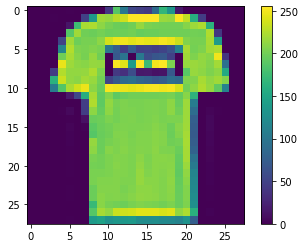

In [18]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [19]:
# 将这些值缩小至 0 到 1 之间，然后将其馈送到神经网络模型。为此，请将这些值除以 255。请务必以相同的方式对训练集和测试集进行预处理
train_images = train_images / 255.0
test_images = test_images / 255.0

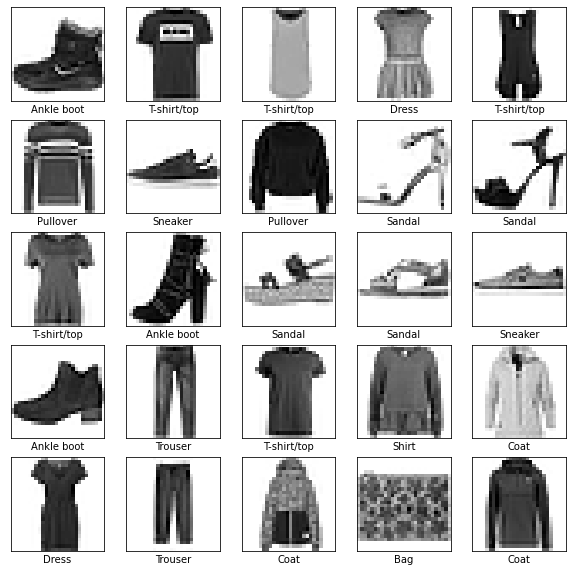

In [20]:
# 为了验证数据的格式是否正确，以及是否已准备好构建和训练网络，显示训练集中的前25个图像，并在每个图像下方显示类名称
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 3.构建模型
构建神经网络需要先配置模型的层，然后再编译模型。

### 3.1 设置层

In [21]:
# 神经网络的基本组成部分是层。层会从向其馈送的数据中提取表示形式。希望这些表示形式有助于解决手头上的问题。

# 大多数深度学习都包括将简单的层链接在一起。大多数层（如 tf.keras.layers.Dense）都具有在训练期间才会学习的参数。
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),# 格式化数据,将二维数组转为一维数组
    # 密集连接或全连接神经层
    keras.layers.Dense(128, activation='relu'),#128个节点(神经元)
    keras.layers.Dense(10) # 会返回一个长度为10的logits数组
])

>该网络的第一层 **<font color=red>tf.keras.layers.Flatten</font>** 将图像格式从二维数组（28 x 28 像素）转换成一维数组（28 x 28 = 784 像素）。将该层视为图像中未堆叠的像素行并将其排列起来。该层没有要学习的参数，它只会重新格式化数据。

>展平像素后，网络会包括两个 **<font color=red>tf.keras.layers.Dense</font>** 层的序列。它们是密集连接或全连接神经层。第一个 Dense 层有 128 个节点（或神经元）。第二个（也是最后一个）层会返回一个长度为 10 的 logits 数组。每个节点都包含一个得分，用来表示当前图像属于 10 个类中的哪一类。

### 3.2 编译模型

在准备对模型进行训练之前，还需要再对其进行一些设置。以下内容是在模型的编译步骤中添加的：

* 损失函数 - 用于测量模型在训练期间的准确率。您会希望最小化此函数，以便将模型“引导”到正确的方向上。
* 优化器 - 决定模型如何根据其看到的数据和自身的损失函数进行更新。
* 指标 - 用于监控训练和测试步骤。以下示例使用了准确率，即被正确分类的图像的比率。

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### 3.3 训练模型

训练神经网络模型需要执行以下步骤：

1. 将训练数据馈送给模型。在本例中，训练数据位于 ```train_images``` 和 ```train_labels``` 数组中。
2. 模型学习将图像和标签关联起来。
3. 要求模型对测试集（在本例中为 ```test_images``` 数组）进行预测。
4. 验证预测是否与 ```test_labels``` 数组中的标签相匹配。

#### 3.3.1 向模型馈送数据

In [24]:
# 要开始训练，请调用 model.fit 方法，这样命名是因为该方法会将模型与训练数据进行“拟合”：
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 999us/step - loss: 0.4986 - accuracy: 0.8257
Epoch 2/10
1875/1875 [==============================] - 2s 801us/step - loss: 0.3742 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 1s 796us/step - loss: 0.3360 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 2s 840us/step - loss: 0.3140 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 2s 807us/step - loss: 0.2961 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 2s 823us/step - loss: 0.2828 - accuracy: 0.8950
Epoch 7/10
1875/1875 [==============================] - 2s 849us/step - loss: 0.2696 - accuracy: 0.8992
Epoch 8/10
1875/1875 [==============================] - 2s 853us/step - loss: 0.2586 - accuracy: 0.9034
Epoch 9/10
1875/1875 [==============================] - 2s 886us/step - loss: 0.2487 - accuracy: 0.9065
Epoch 10/10
1875/1875 [==============================] - 2s 874u

**```在模型训练期间，会显示损失和准确率指标。此模型在训练数据上的准确率达到了 0.91（或 91%）左右。```**

#### 3.3.2 评估准确率

In [27]:
# 比较模型在测试数据集上的表现：
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTrain accuracy:', 0.9108)
print('Test accuracy:', test_acc)

313/313 - 0s - loss: 0.3453 - accuracy: 0.8807

Train accuracy: 0.9108
Test accuracy: 0.8806999921798706


> **结果表明，模型在测试数据集上的准确率略低于训练数据集。训练准确率和测试准确率之间的差距代表过拟合。过拟合是指机器学习模型在新的、以前未曾见过的输入上的表现不如在训练数据上的表现。过拟合的模型会“记住”训练数据集中的噪声和细节，从而对模型在新数据上的表现产生负面影响。**

#### 3.3.3 进行预测

In [28]:
# 在模型经过训练后，可以使用它对一些图像进行预测。模型具有线性输出，即 logits。
# 附加一个 softmax 层，将 logits 转换成更容易理解的概率。
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [29]:
predictions = probability_model.predict(test_images)

在上例中，模型预测了测试集中每个图像的标签。看看第一个预测结果：

In [30]:
predictions[0]

array([2.5200750e-09, 6.0978923e-11, 6.0970319e-11, 4.3770582e-12,
       2.9458616e-09, 2.0359008e-02, 8.9780370e-09, 6.1838143e-03,
       8.4772109e-09, 9.7345710e-01], dtype=float32)

预测结果是一个包含 10 个数字的数组。它们代表模型对 10 种不同服装中每种服装的“置信度”

In [31]:
# 查看哪个标签的置信度值最大：
np.argmax(predictions[0])

9

In [32]:
# 因此，该模型非常确信这个图像是短靴，或 class_names[9]。通过检查测试标签发现这个分类是正确的：
test_labels[0]

9

```可以将其绘制成图表，看看模型对于全部 10 个类的预测。```

In [33]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

#### 3.3.4 验证预测结果

在模型经过训练后，可以使用它对一些图像进行预测。

来看看第 0 个图像、预测结果和预测数组。正确的预测标签为蓝色，错误的预测标签为红色。数字表示预测标签的百分比（总计为 100）。

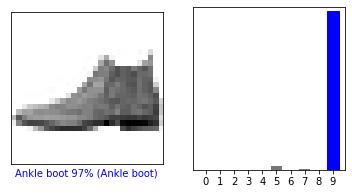

In [35]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

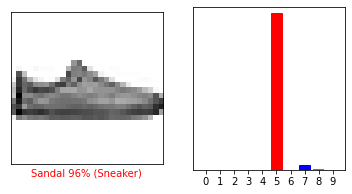

In [36]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

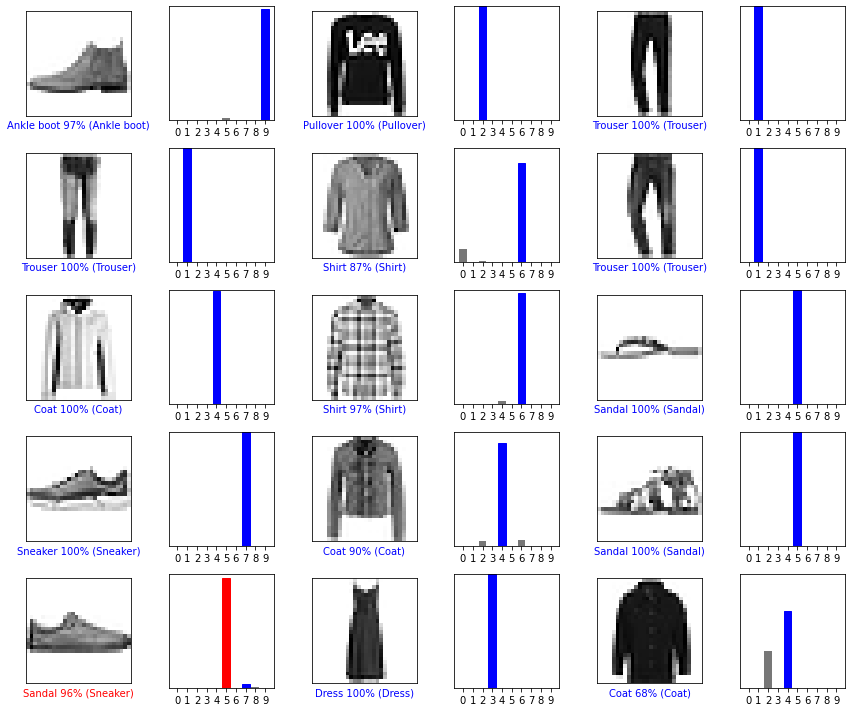

In [37]:
# 让我们用模型的预测绘制几张图像。请注意，即使置信度很高，模型也可能出错。
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### 3.4 使用训练好的模型

In [38]:
# 使用训练好的模型对单个图像进行预测。
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


**<font color=Blue>tf.keras<font>** 模型经过了优化，可同时对一个批或一组样本进行预测。因此，即便您只使用一个图像，您也需要将其添加到列表中：

In [39]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [40]:
# 现在预测这个图像的正确标签：
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.0680091e-06 6.7908368e-15 9.9975318e-01 3.1369520e-13 3.0012563e-05
  6.2993569e-15 2.1481304e-04 8.3288015e-19 1.1868600e-12 1.4226185e-13]]


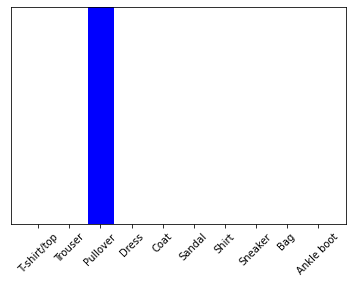

In [41]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

**<font color=Blue>keras.Model.predict<font>** 会返回一组列表，每个列表对应一批数据中的每个图像。在批次中获取对我们（唯一）图像的预测：

In [42]:
np.argmax(predictions_single[0])

2

### 该模型会按照预期预测标签。

In [ ]:
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.